In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
a =  0.760#007 # Incognita variable inicial 
G =  1
m = 1 # masas

In [3]:
h=3.33E-4#0.005 # time step
tMin = 0.0
tMax = 2.0 # 1.2 
N = int((tMax - tMin)/h) # numero de puntos

In [4]:
def coreografia4_init(t, p, r, a):
    t[0] = [tMin,tMin,tMin, tMin]
    # momento con V(0) inicial 
    p[0] = m*np.array([0.0+ a*1j,
                       -2.01155925929 - 1.19817066623*1j,
                       0.0 + 1.63619158614*1j, 
                       2.01155925929 - 1.19817066623*1j])

    r[0] = np.array([0.384277200514 + 0.0*1j,
                       -0.0156823005697 - 0.13966430504*1j,
                       -0.352912599375 + 0.0*1j, 
                       -0.0156823005697 + 0.13966430504*1j])
    return t, p, r 

In [5]:
def p_prime(r_t):
    r41 = r_t-np.roll(r_t,1)
    r42 = r_t-np.roll(r_t,2)
    r43 = r_t-np.roll(r_t,3)
    return -G*m*m*(r41/(np.abs(r41)**3)+r42/(np.abs(r42)**3)+r43/(np.abs(r43)**3))

def r_prime(p_t):
    return p_t/m

def func_prime(r_t,p_t):
    return r_prime(p_t),p_prime(r_t)

In [6]:
def RK4(N, r, p, t, h):
    for i in range(1,N):

        k1 = func_prime(r[i-1],p[i-1])

        t1 = t[i-1] + (h/2.0)
        r1 = r[i-1] + (h/2.0) * k1[0]
        p1 = p[i-1] + (h/2.0) * k1[1]
        k2 = func_prime(r1, p1)

        t2 = t[i-1] + (h/2.0)
        r2 = r[i-1] + (h/2.0) * k2[0]
        p2 = p[i-1] + (h/2.0) * k2[1]
        k3 = func_prime(r2, p2)

        t3 = t[i-1] + h
        r3 = r[i-1] + h * k3[0]
        p3 = p[i-1] + h * k3[1]
        k4 = func_prime(r3, p3)

        average_kr = (1.0/6.0)*(k1[0] + 2.0*k2[0] + 2.0*k3[0] + k4[0])
        average_kp = (1.0/6.0)*(k1[1] + 2.0*k2[1] + 2.0*k3[1] + k4[1])

        t[i] = t[i-1] + h
        r[i] = r[i-1] + h * average_kr
        p[i] = p[i-1] + h * average_kp
        #print  'p =>', p[i,0], '\n'
    return r, p, t

import matplotlib.animation as animation

fig = plt.figure()
ax=fig.add_subplot(111)
colors= ['c','m','r']

def anim(t):
    d=t-10
    ax.cla()
    ax.set_xlim([-0.3,0.3])
    ax.set_ylim([-0.1,0.1])
    for i in range(4):
        ax.plot(np.real(r[d:t+1,i]), np.imag(r[d:t+1,i]),colors[i],alpha=0.4, lw=2)
        ax.plot(np.real(r[t,i]), np.imag(r[t,i]),colors[i]+'o')

ani=animation.FuncAnimation(fig, anim, frames=N )
ani.save('coreo.gif',fps=30, dpi=150, writer='imagemagick')



## Numero lindo!!! 

**a =  0.76015 # Incognita variable inicial**

posicion original (0.384277200514+0j) pos final (0.384326219367-0.00083623360132j)
-4.99286086872e-05 5


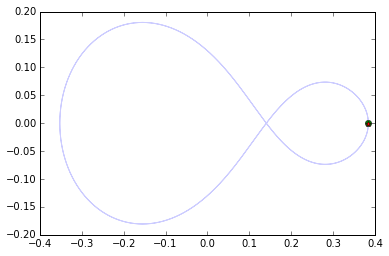

In [59]:
a =  0.76015#5 # Incognita variable inicial 
h=3.33E-4 # time step
tMin = 0.0
tMax = 2.0  

N = int((tMax - tMin)/h) # numero de puntos
#print N
t = np.zeros((N,4),dtype=np.complex)
p = np.zeros((N,4),dtype=np.complex)
r = np.zeros((N,4),dtype=np.complex)
coreografia4_init(t, p, r, a)
RK4(N, r, p, t, h)

plt.plot(np.real(r[:,0]), np.imag(r[:,0]),alpha=0.2) 
plt.plot(np.real(r[0,0]), np.imag(r[0,0]), 'o') 
plt.plot(np.real(r[-1,0]), np.imag(r[-1,0]), '*') 
print 'posicion original',r[0,0] , 'pos final', r[-1,0]
dis_a=np.abs(r[0,0])
dist_af=np.abs(r[-1,0])
dif= dis_a - dist_af
s_a= str(a)
d= s_a[::-1].find('.')
#print dis_a, (0.3844**2)**(1./2.), dist_af, (0.216236413593**2 + (0.182635158167)**2)**(1./2.)
print dif, d
#-30.00 , -0.018, -34..., -1.2336, -2.2603, 0.01551
# el que sirve es positivo 0.1001
#las= [(0.09 < difference_1),(0.09 < difference_2 ) ]

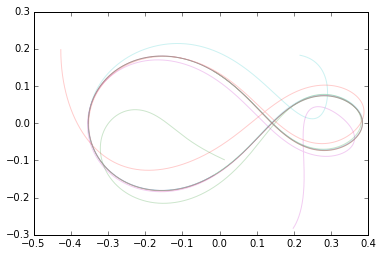

In [43]:
colors= ['c','m','r', 'g']
for i in range (4):
    plt.plot(np.real(r[:,i]), np.imag(r[:,i]),colors[i]+'-', alpha=0.2)


In [65]:
# Pueba Hermosa!!! 
a= 0.7
cont= 0
des_inicial= 10
decimal= float(des_inicial**(cont+2))
k=0
c=0

while k<10:
    s_a= str(a)
    d= s_a[::-1].find('.')

    b=float(k)
    a_1= a+ b/decimal
    a_2= a+ b/decimal+ 9./(decimal*10)
    
    # inicializacion 
    t_1 = np.zeros((N,4),dtype=np.complex)
    p_1 = np.zeros((N,4),dtype=np.complex)
    r_1 = np.zeros((N,4),dtype=np.complex)
    coreografia4_init(t_1, p_1, r_1, a_1)
    r_1, p_1, t_1= RK4(N, r_1, p_1, t_1, h)
    
    difference_1= np.abs(r_1[0,0]) - np.abs(r_1[-1,0]) # diferencia vectorial
    
    t_2 = np.zeros((N,4),dtype=np.complex)
    p_2 = np.zeros((N,4),dtype=np.complex)
    r_2 = np.zeros((N,4),dtype=np.complex)
    coreografia4_init(t_2, p_2, r_2, a_2)
    r_2, p_2, t_2= RK4(N, r_2, p_2, t_2, h)
    
    difference_2= np.abs(r_2[0,0]) - np.abs(r_2[-1,0])
    
    cond_if = [(0.09 < difference_1),(0.09 < difference_2 ), 
               (0.09 < difference_1),(0.09 < difference_2 ), 
               (0.019 > difference_1),(0.019 > difference_2 ), 
               (-0.0001 > difference_1),(-0.0001 > difference_2 ) ]

    print b, a_1, a_2, '\n'
    
    if (d==4):
        if(difference_1<0 or difference_2< 0):
            a=a_1
            break
        else:
            k= k+1
    else: 
        
        if (difference_1>0 or difference_2> 0):
            print b, 'dentro de mayor', difference_1, difference_2 , cond_if[c], cond_if[c+1]
        
            if (cond_if[c] == True or  cond_if[c+1] == True):# cond_if[cont]
                a=a_1
                cont = cont +1
                decimal= float(des_inicial**(cont+2))
                print 'k=0' , c, cond_if[c], cond_if[c+1], cont
                k=0
                c= c+2
            else:
                k=k+1
        else:
            k=k+1
        
print a,cont 

0.0 0.7 0.709 

1.0 0.71 0.719 

2.0 0.72 0.729 

3.0 0.73 0.739 

4.0 0.74 0.749 

5.0 0.75 0.759 

5.0 dentro de mayor -2.26036012288 0.0155104295056 False False
6.0 0.76 0.769 

6.0 dentro de mayor 0.101233409622 -0.432004333648 True False
k=0 0 True False 1
0.0 0.76 0.7609 

0.0 dentro de mayor 0.101233409622 -0.2135599856 True False
k=0 2 True False 2
0.0 0.76 0.76009 

0.0 dentro de mayor 0.101233409622 0.0239976686455 False False
1.0 0.7601 0.76019 

1.0 dentro de mayor 0.0181845644769 -0.00432269235467 True True
k=0 4 True True 3
0.0 0.7601 0.760109 

1.0 0.76011 0.760119 

2.0 0.76012 0.760129 

3.0 0.76013 0.760139 

4.0 0.76014 0.760149 

5.0 0.76015 0.760159 

0.76015 3


Para calcular la energia potencial y cinética se utilizan las siguientes ecuaciones: 

$$\mathbf{U}=\frac{{-G}*M*m}{r}$$

Donde r es la disctancia entre las particulas 

$$\mathbf{K}=\frac{\mathbf{p^2}}{2}$$

Este sera la energia total 

$${E_t}=\mathbf{U}+\mathbf{K}$$



In [ ]:
t = np.zeros(N,dtype=np.complex)
p = np.zeros((N,4),dtype=np.complex)
r = np.zeros((N,4),dtype=np.complex)


MCMC
evaluo la funcion en x numeros (de  t donde  se hace popo)
primer  periodo y  segundo periodo 
si la diferencvia es mayor  que  ncondicion Check!!!!

2000


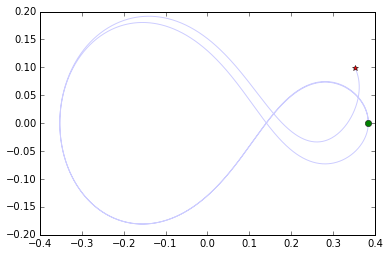

In [51]:
a =  0.7601#5 # Incognita variable inicial 
h=0.001 # time step
tMin = 0.0
tMax = 2.0  

N = int((tMax - tMin)/h) # numero de puntos
print N
t = np.zeros((N,4),dtype=np.complex)
p = np.zeros((N,4),dtype=np.complex)
r = np.zeros((N,4),dtype=np.complex)
coreografia4_init(t, p, r, a)
RK4(N, r, p, t, h)

plt.plot(np.real(r[:,0]), np.imag(r[:,0]),alpha=0.2) 
plt.plot(np.real(r[0,0]), np.imag(r[0,0]), 'o') 
plt.plot(np.real(r[-1,0]), np.imag(r[-1,0]), '*') 

In [35]:
%matplotlib inline
a = 0.76015 # Incognita variable inicial 
h = 0.001 # time step
tMin = 0.0
tMax = 1.0 # Hasta el primer periodo
G = 1
m = 1
N = int((tMax - tMin)/h) # numero de puntos

#Inicializamos
r = np.zeros((N,4),dtype=np.complex)
p = np.zeros((N,4),dtype=np.complex)
t = np.zeros(N)

coreografia4_init(r, p, t, a)
RK4(N, r, p, t, h)

r41 = np.abs(np.roll(r,1)-r)
r42 = np.abs(np.roll(r,2)-r)
r43 = np.abs(np.roll(r,3)-r)
U = (np.sum(-G*m*m/r41 - G*m*m/r42 - G*m*m/r43,axis=1))*0.5 #  se divide  entre dos ya que por cada suma 
                                                            #  estoy sumando 2 veces cada par de distancias. 
K = np.sum((np.abs(p)**2)/2.0,axis=1)
plt.plot(t,U, label='U')
plt.plot(t,K, label='K')
plt.plot(t,(U+K), label='Et')
plt.legend(loc=0)

ValueError: setting an array element with a sequence.

Hacer  una funcion de a que mire las  diferencias  en distacia de punto inicial y final. y  encontrar el minomo de la  funcion. 

In [61]:
# Pueba Hermosa!!! 
a= 0.7
cont= 0
des_inicial= 10
decimal= float(des_inicial**(cont+2))
k=0
c=0

while k<10:
    s_a= str(a)
    d= s_a[::-1].find('.')
    
    if(d==5):
        break 
        
    b=float(k)
    a_1= a+ b/decimal
    a_2= a+ b/decimal+ 9./(decimal*10)
    
    # inicializacion 
    t_1 = np.zeros((N,4),dtype=np.complex)
    p_1 = np.zeros((N,4),dtype=np.complex)
    r_1 = np.zeros((N,4),dtype=np.complex)
    coreografia4_init(t_1, p_1, r_1, a_1)
    r_1, p_1, t_1= RK4(N, r_1, p_1, t_1, h)
    
    difference_1= np.abs(r_1[0,0]) - np.abs(r_1[-1,0]) # diferencia vectorial
    
    t_2 = np.zeros((N,4),dtype=np.complex)
    p_2 = np.zeros((N,4),dtype=np.complex)
    r_2 = np.zeros((N,4),dtype=np.complex)
    coreografia4_init(t_2, p_2, r_2, a_2)
    r_2, p_2, t_2= RK4(N, r_2, p_2, t_2, h)
    
    difference_2= np.abs(r_2[0,0]) - np.abs(r_2[-1,0])
    
    cond_if = [(0.09 < difference_1),(0.09 < difference_2 ), 
               (0.09 < difference_1),(0.09 < difference_2 ), 
               (0.019 > difference_1),(0.019 > difference_2 ), 
               (0.0005 > difference_1),(0.0005 > difference_2 ) ]

    print b, a_1, a_2, '\n'
    
    if (difference_1>0 or difference_2> 0):
        print b, 'dentro de mayor', difference_1, difference_2 , cond_if[c], cond_if[c+1]
        
        if (cond_if[c] == True or  cond_if[c+1] == True):# cond_if[cont]
            a=a_1
            cont = cont +1
            decimal= float(des_inicial**(cont+2))
            print 'k=0' , c, cond_if[c], cond_if[c+1], cont
            k=0
            c= c+2
        else:
            k=k+1
    else:
        k=k+1
        
print a,cont

0.0 0.7 0.709 

1.0 0.71 0.719 

2.0 0.72 0.729 

3.0 0.73 0.739 

4.0 0.74 0.749 

5.0 0.75 0.759 

5.0 dentro de mayor -2.26036012288 0.0155104295056 False False
6.0 0.76 0.769 

6.0 dentro de mayor 0.101233409622 -0.432004333648 True False
k=0 0 True False 1
0.0 0.76 0.7609 

0.0 dentro de mayor 0.101233409622 -0.2135599856 True False
k=0 2 True False 2
0.0 0.76 0.76009 

0.0 dentro de mayor 0.101233409622 0.0239976686455 False False
1.0 0.7601 0.76019 

1.0 dentro de mayor 0.0181845644769 -0.00432269235467 True True
k=0 4 True True 3
0.0 0.7601 0.760109 

0.0 dentro de mayor 0.0181845644769 0.0135821643953 False False
1.0 0.76011 0.760119 

1.0 dentro de mayor 0.0131079008092 0.00917201385738 False False
2.0 0.76012 0.760129 

2.0 dentro de mayor 0.00877135533349 0.00548831729513 False False
3.0 0.76013 0.760139 

3.0 dentro de mayor 0.00515878883271 0.00249816763741 False False
4.0 0.76014 0.760149 

4.0 dentro de mayor 0.0022355144913 0.000151695642302 False True
k=0 6 False True